<a href="https://colab.research.google.com/github/Ayush-mishra-0-0/ML/blob/main/ayushKumarMishra_12240340_assign5_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <p style="text-align: center; color: cyan;" >Name - Ayush Kumar Mishra</p>
# <p style="text-align: center; color: blue;" >Roll No- 12240340</p>

# Ensemble Learning

## Import all necessary libraries

In [20]:
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from dataclasses import dataclass, field
from typing import List, Tuple, Dict
import warnings
warnings.filterwarnings('ignore')

### Initializing the random state and make dummy binary classification dataset.

In [15]:
RANDOM_STATE = 42
X, y = make_classification(n_samples=500, n_features=25, n_clusters_per_class=1,
                           n_informative=15, random_state=RANDOM_STATE)

### All the classifiers in ensemble

In [16]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'", RandomForestClassifier(warm_start=True, oob_score=True, max_features="sqrt", n_jobs=-1, random_state=RANDOM_STATE)),
    ("ExtraTreesClassifier, max_features='sqrt'", ExtraTreesClassifier(warm_start=True, oob_score=True, bootstrap=True, max_features="sqrt", n_jobs=-1, random_state=RANDOM_STATE)),
    ("ExtraTreesClassifier, max_features=None", ExtraTreesClassifier(warm_start=True, oob_score=True, bootstrap=True, max_features=None, n_jobs=-1, random_state=RANDOM_STATE))
]

## Now plotting  goal is to visualize how the OOB error rate changes with an increasing number of estimators for different ensemble classifiers, providing insights into their performance characteristics and optimal configurations.

Note: This experiment uses a fixed random state (123) for reproducibility.


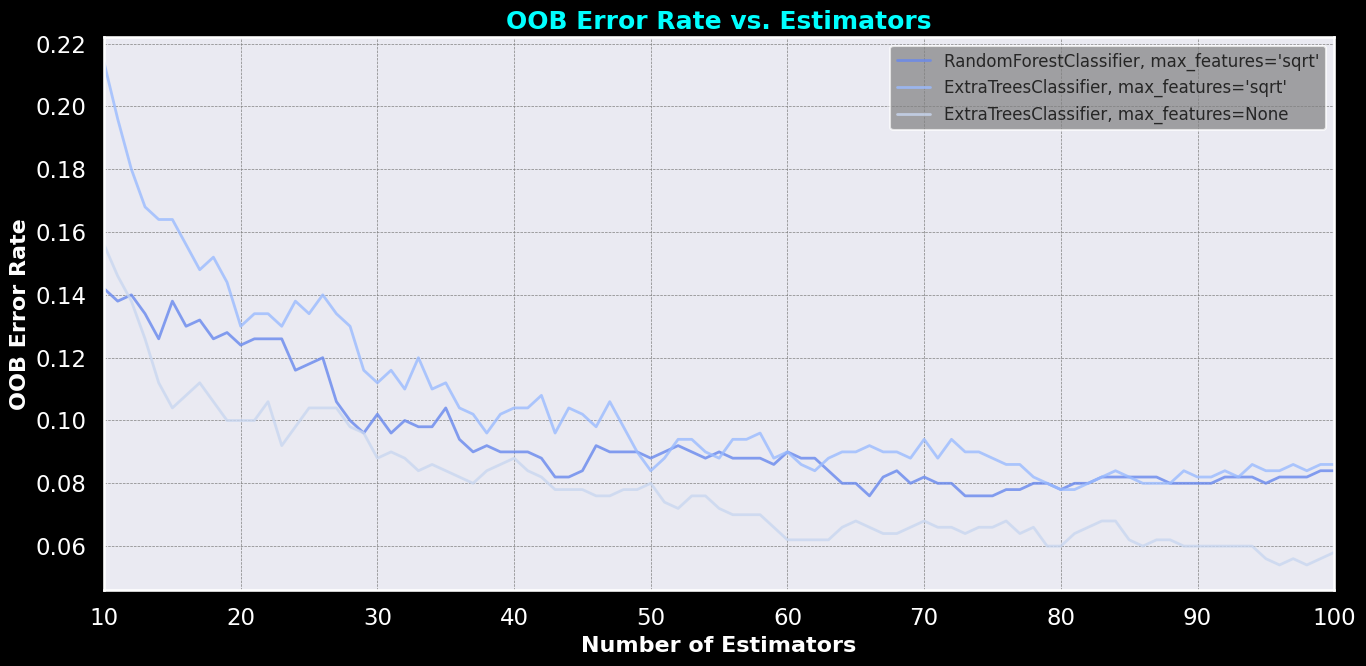

In [17]:
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 10
max_estimators = 100

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

sns.set(style="dark", palette="coolwarm", context="talk")

plt.figure(figsize=(14, 7), facecolor='black')

for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    sns.lineplot(x=xs, y=ys, label=label, linewidth=2, alpha=0.8)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("Number of Estimators", fontsize=16, color='white', fontweight='bold')
plt.ylabel("OOB Error Rate", fontsize=16, color='white', fontweight='bold')
plt.title("OOB Error Rate vs. Estimators", fontsize=18, color='cyan', fontweight='bold')

plt.legend(loc="upper right", fontsize=12, facecolor='gray', framealpha=0.7, edgecolor='white')

plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.tick_params(colors='white')

plt.tight_layout()

plt.show()


# Bias-Variance Trade-off Analysis for Ensemble Models

This script evaluates the bias-variance decomposition of different ensemble classifiers (Random Forest and Extra Trees) by examining how their bias, variance, and total error evolve with varying numbers of estimators.


1. **Data Creation**:
   - Synthetic dataset generated using `make_classification`
   - 1000 samples, 20 features (15 informative, 5 redundant)

2. **Classifiers**:
   - Random Forest with `max_features='sqrt'`
   - Extra Trees with `max_features='sqrt'`
   - Extra Trees with `max_features=None`

3. **Bias-Variance Decomposition**:
   - A custom function for calculating the bias and variance
   - Repeated training and prediction to gather estimates

In [ ]:
def bias_variance_decomposition(model, X_tr, y_tr, X_te, y_te, rounds=200):
    predictions_all = []

    for _ in range(rounds):
        model.fit(X_tr, y_tr)
        predictions = model.predict_proba(X_te)[:, 1]
        predictions_all.append(predictions)

    predictions_all = np.array(predictions_all)

    mean_predictions = np.mean(predictions_all, axis=0)
    bias = np.mean((y_te - mean_predictions) ** 2)
    variance = np.mean(np.var(predictions_all, axis=0))

    return bias, variance


In [ ]:

# Range of estimators
n_estimators_range = range(1, 151, 10)

# Calculate bias and variance
results = {name: {'bias': [], 'variance': [], 'error': []} for name, _ in classifiers}

# Generate dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_redundant=5, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define classifiers
rf = RandomForestClassifier(warm_start=True, oob_score=True, max_features="sqrt", random_state=42)
et_sqrt = ExtraTreesClassifier(warm_start=True, oob_score=True, bootstrap=True,
                               max_features="sqrt", random_state=42)
et_all = ExtraTreesClassifier(warm_start=True, oob_score=True, bootstrap=True,
                              max_features=None, random_state=42)

classifiers = [
    ("Random Forest", rf),
    ("Extra Trees (sqrt)", et_sqrt),
    ("Extra Trees (all)", et_all)
]


In [ ]:

@dataclass
class ModelConfig:
    name: str
    model: object
    color: str

@dataclass
class ExperimentResults:
    bias: List[float] = field(default_factory=list)
    variance: List[float] = field(default_factory=list)
    error: List[float] = field(default_factory=list)

class BiasVarianceAnalyzer:
    def __init__(self, n_samples: int = 1000, n_features: int = 20, test_size: float = 0.3):
        self.X, self.y = make_classification(
            n_samples=n_samples, n_features=n_features,
            n_informative=15, n_redundant=5, random_state=42
        )
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=42
        )

    def decompose(self, model: object, rounds: int = 200) -> Tuple[float, float]:
        predictions = np.array([
            model.fit(self.X_train, self.y_train).predict_proba(self.X_test)[:, 1]
            for _ in range(rounds)
        ])
        mean_pred = np.mean(predictions, axis=0)
        bias = np.mean((self.y_test - mean_pred) ** 2)
        variance = np.mean(np.var(predictions, axis=0))
        return bias, variance

    def run_experiment(self, models: List[ModelConfig], estimator_range: range) -> Dict[str, ExperimentResults]:
        results = {model.name: ExperimentResults() for model in models}

        for n_estimators in estimator_range:
            for model in models:
                model.model.set_params(n_estimators=n_estimators)
                bias, variance = self.decompose(model.model)
                results[model.name].bias.append(bias)
                results[model.name].variance.append(variance)
                results[model.name].error.append(bias + variance)

        return results

    @staticmethod
    def plot_results(results: Dict[str, ExperimentResults], estimator_range: range, models: List[ModelConfig]):
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        metrics = ['Bias', 'Variance', 'Total Error']

        for ax, metric in zip(axes, metrics):
            for model in models:
                data = getattr(results[model.name], metric.lower().replace(' ', '_'))
                sns.lineplot(x=estimator_range, y=data, label=model.name, color=model.color, ax=ax)

            ax.set_xlabel('Number of Estimators')
            ax.set_ylabel(metric)
            ax.set_title(f'{metric} vs Number of Estimators')
            ax.legend()
            ax.grid(True)

        plt.tight_layout()
        plt.show()

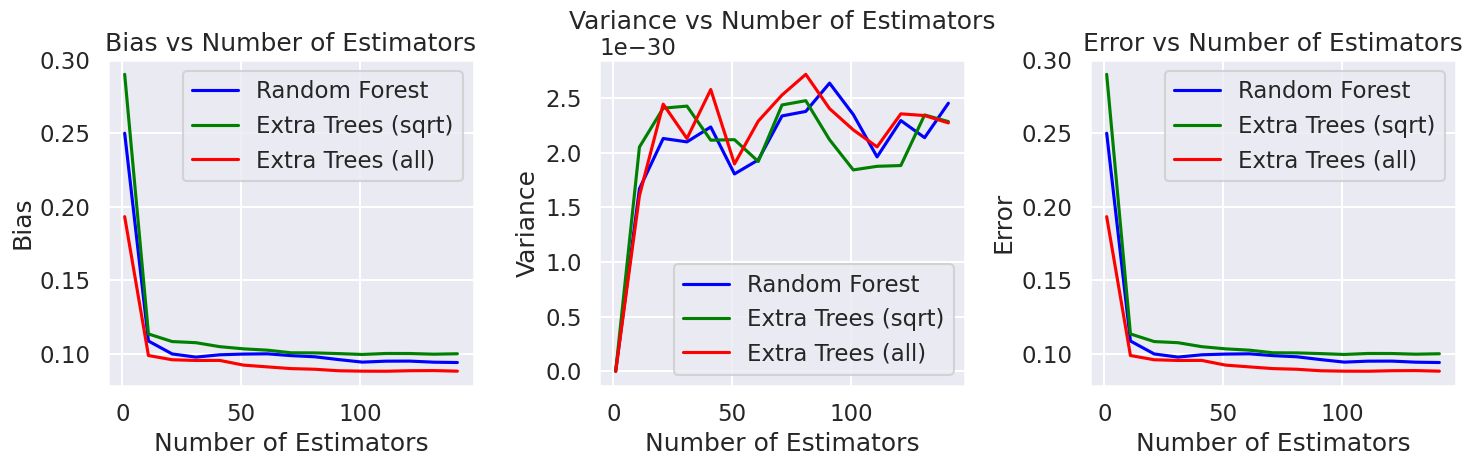

In [18]:
if __name__ == "__main__":
    analyzer = BiasVarianceAnalyzer()

    models = [
        ModelConfig("Random Forest", RandomForestClassifier(warm_start=True, oob_score=True, max_features="sqrt", random_state=42), "blue"),
        ModelConfig("Extra Trees (sqrt)", ExtraTreesClassifier(warm_start=True, oob_score=True, bootstrap=True, max_features="sqrt", random_state=42), "green"),
        ModelConfig("Extra Trees (all)", ExtraTreesClassifier(warm_start=True, oob_score=True, bootstrap=True, max_features=None, random_state=42), "red")
    ]

    estimator_range = range(1, 151, 10)
    results = analyzer.run_experiment(models, estimator_range)
    analyzer.plot_results(results, estimator_range, models)